In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
import seaborn as sns

In [3]:
from IPython.core.display import HTML
css = open('style-table.css').read() + open('style-notebook.css').read()
HTML('<style>{}</style>'.format(css))

In [4]:
titles = pd.DataFrame.from_csv('data/titles.csv', index_col=None)
titles.head()

,title,year
0,The Rising Son,1990
1,The Thousand Plane Raid,1969
2,Crucea de piatra,1993
3,Country,2000
4,Gaiking II,2011


In [6]:
cast = pd.DataFrame.from_csv('data/cast.csv', index_col=None)
cast.head(2)

,title,year,name,type,character,n
0,Suuri illusioni,1985,Homo $,actor,Guests,22.0
1,Battle of the Sexes,2017,$hutter,actor,Bobby Riggs Fan,10.0


### Using groupby(), plot the number of films that have been released each decade in the history of cinema.

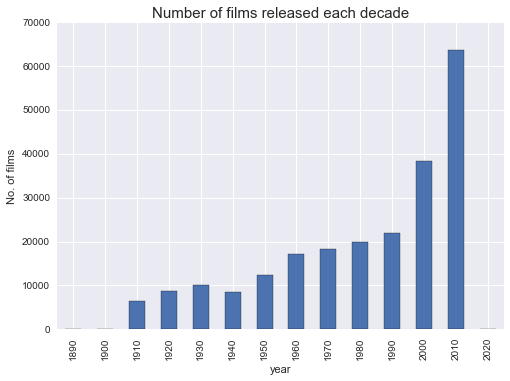

In [7]:
titles.groupby(titles.year // 10 * 10).size().plot(kind='bar')
plt.title('Number of films released each decade', fontsize=15)
plt.xlabel('year')
plt.ylabel('No. of films')

### Use groupby() to plot the number of "Hamlet" films made each decade.

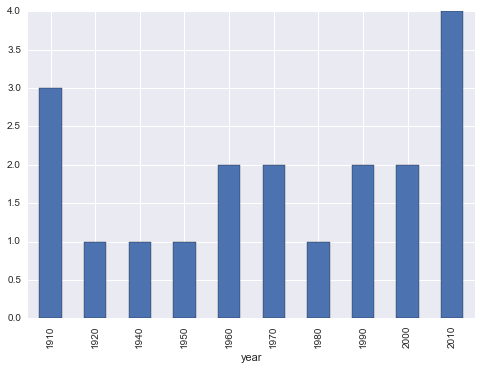

In [9]:
hamlet = titles[titles.title == 'Hamlet']
hamlet.groupby(hamlet.year // 10 * 10).size().plot(kind='bar')

### How many leading (n=1) roles were available to actors, and how many to actresses, in each year of the 1950s?

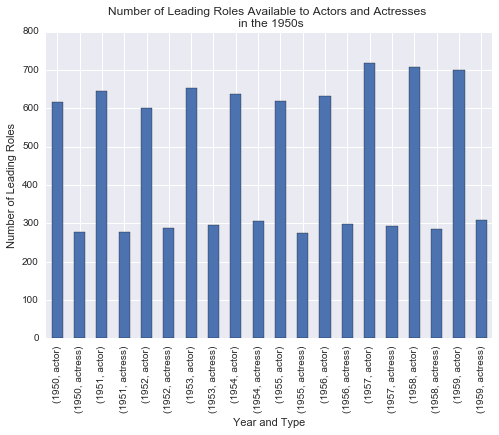

In [15]:
fiftysones = cast[(cast.n == 1.0) & (cast.year >= 1950) & (cast.year < 1960)]
fiftysones.groupby(['year', 'type']).size().plot(kind='bar')
plt.title('Number of Leading Roles Available to Actors and Actresses \n in the 1950s')
plt.ylabel('Number of Leading Roles')
plt.xlabel('Year and Type')

### In the 1950s decade taken as a whole, how many total roles were available to actors, and how many to actresses, for each "n" number 1 through 5?

In [16]:
fiftys = cast[(cast["year"] >= 1950) & (cast["year"] < 1960) & (cast.n >= 1) & (cast.n <=5)]

In [17]:
fiftysgrp = fiftys.groupby(['type', 'n']).size()
fiftysgrp

type     n  
actor    1.0    6530
         2.0    4481
         3.0    5508
         4.0    5505
         5.0    5534
actress  1.0    2903
         2.0    4502
         3.0    3105
         4.0    2812
         5.0    2509
dtype: int64

### Use groupby() to determine how many roles are listed for each of the Pink Panther movies.

In [18]:
pinkpanther = cast[cast.title == "The Pink Panther"]
pinkpanther.head(2)

,title,year,name,type,character,n
900,The Pink Panther,2006,William Abadie,actor,Bizu,11.0
13937,The Pink Panther,2006,Scott (II) Adkins,actor,Jacquard,20.0


In [19]:
pinkpanthergrp = pinkpanther.groupby(["year", "character"]).size()
pinkpanthergrp

year  character                  
1963  Angela Dunning                 1
      Aristotle Sarajos              1
      Artoff                         1
      Defence Barrister              1
      Felix Townes                   1
      George Lytton                  1
      Greek 'cousin'                 1
      Hotel Manager                  2
      Insp. Jacques Clouseau         1
      Monica Fawn                    1
      Pierre Luigi - Photographer    1
      Policeman                      2
      Saloud                         1
      Simone Clouseau                1
      Sir Charles Lytton             1
      The Princess                   1
      Tucker                         1
2006  Agent 006                      1
      Agent Corbeille                1
      Agent Savard                   1
      Airline Pilot                  1
      Arab                           1
      Ballroom Reporter              1
      Bizu                           1
      Black Market Jeweler    

### List, in order by year, each of the films in which Frank Oz has played more than 1 role.

In [20]:
oz = cast[cast.name == "Frank Oz"]
oz.head(2)

,title,year,name,type,character,n
1614567,An American Werewolf in London,1981,Frank Oz,actor,Mr. Collins,13.0
1614568,An American Werewolf in London,1981,Frank Oz,actor,Miss Piggy,13.0


In [39]:
ozmovies = oz.groupby(['year', 'title']).size().reset_index()
ozmovies

,year,title,0
0,1979,The Muppet Movie,8
1,1980,Star Wars: Episode V - The Empire Strikes Back,1
2,1980,The Blues Brothers,1
3,1981,An American Werewolf in London,2
4,1981,The Great Muppet Caper,6
5,1982,The Dark Crystal,2
6,1983,Star Wars: Episode VI - Return of the Jedi,1
7,1983,Superman III,1
8,1983,Trading Places,1
9,1984,The Muppets Take Manhattan,7


In [40]:
ozmovies_morethan1char = ozmovies[ozmovies[0] > 1]
ozmovies_morethan1char

,year,title,0
0,1979,The Muppet Movie,8
3,1981,An American Werewolf in London,2
4,1981,The Great Muppet Caper,6
5,1982,The Dark Crystal,2
9,1984,The Muppets Take Manhattan,7
10,1985,Follow That Bird,3
14,1992,The Muppet Christmas Carol,7
15,1996,Muppet Treasure Island,4
17,1999,Muppets from Space,4
19,1999,The Adventures of Elmo in Grouchland,3


### List each of the characters that Frank Oz has portrayed at least twice.

In [42]:
o = ozmovies_morethan1char.merge(oz)
o

,year,title,0,name,type,character,n
0,1979,The Muppet Movie,8,Frank Oz,actor,Miss Piggy,2.0
1,1979,The Muppet Movie,8,Frank Oz,actor,Fozzie Bear,2.0
2,1979,The Muppet Movie,8,Frank Oz,actor,Animal,2.0
3,1979,The Muppet Movie,8,Frank Oz,actor,Sam the Eagle,2.0
4,1979,The Muppet Movie,8,Frank Oz,actor,Doc Hopper's Men,2.0
5,1979,The Muppet Movie,8,Frank Oz,actor,Marvin Suggs,2.0
6,1979,The Muppet Movie,8,Frank Oz,actor,Swedish Chef (assistant),2.0
7,1979,The Muppet Movie,8,Frank Oz,actor,Motorcycle Guy,2.0
8,1981,An American Werewolf in London,2,Frank Oz,actor,Mr. Collins,13.0
9,1981,An American Werewolf in London,2,Frank Oz,actor,Miss Piggy,13.0


In [45]:
o.groupby(['year', 'title', 'character']).size()

year  title                                 character                                           
1979  The Muppet Movie                      Animal                                                  1
                                            Doc Hopper's Men                                        1
                                            Fozzie Bear                                             1
                                            Marvin Suggs                                            1
                                            Miss Piggy                                              1
                                            Motorcycle Guy                                          1
                                            Sam the Eagle                                           1
                                            Swedish Chef (assistant)                                1
1981  An American Werewolf in London        Miss Piggy                                 